<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Prediksi_harga_rumah_randomForestipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Kasus
Kita akan menggunakan dataset "House Sales in King County, USA" untuk memprediksi harga rumah berdasarkan fitur-fitur seperti jumlah kamar, luas tanah, kondisi, tahun dibangun, dll.
Targetnya adalah harga rumah.

---

**Link download dataset (gunakan untuk latihan):**
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

---

**Langkah-langkah yang akan dilakukan:**
1. Preprocessing data (mengatasi nilai kosong, normalisasi).
2. Penerapan RandomForest untuk prediksi.
3. Visualisasi model dan evaluasi dengan berbagai pendekatan.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

In [8]:
df = pd.read_csv('/content/kc_house_data.csv')

In [9]:
# Cek info awal mengenai data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# 2. Preprocessing Data

In [10]:
# Menghapus kolom yang tidak relevan
df = df.drop(columns=['id', 'date'])

In [11]:
# Mengatasi nilai kosong (jika ada)
df.fillna(df.median(), inplace=True)

In [12]:
# Normalisasi data (StandardScaler)
scaler = StandardScaler()
x = df.drop('price', axis=1)
y = df['price']
x_scaled = scaler.fit_transform(x)

In [13]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# 3. Training Model RandomForest

In [14]:
# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# 4. Evaluasi Model
y_pred = model.predict(x_test)

# Menampilkan hasil evaluasi
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 22114624764.573048
R^2 Score: 0.8537167237305755


# 5. Visualisasi

<ipython-input-18-de2e294079b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='coolwarm')


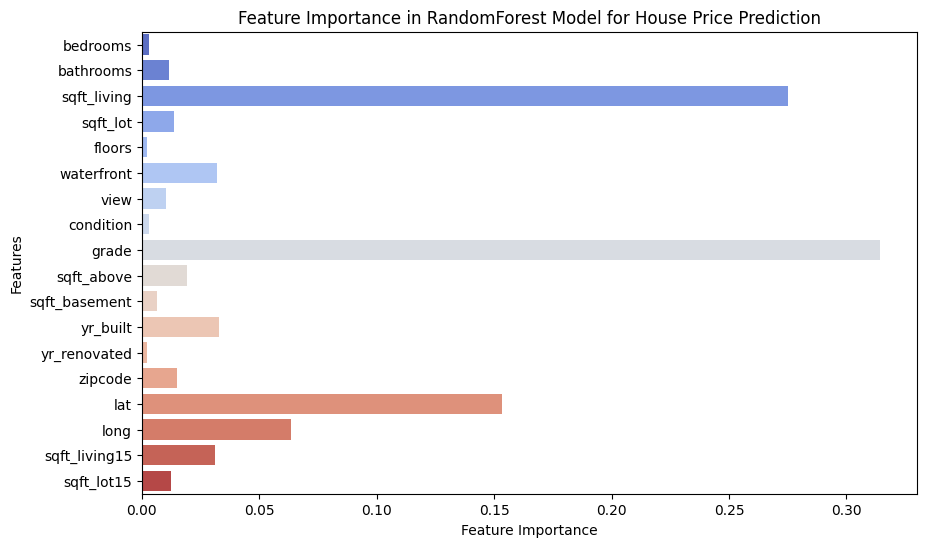

In [18]:
# Visualisasi Feature Importance
feature_importances = model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='coolwarm')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForest Model for House Price Prediction')
plt.show()

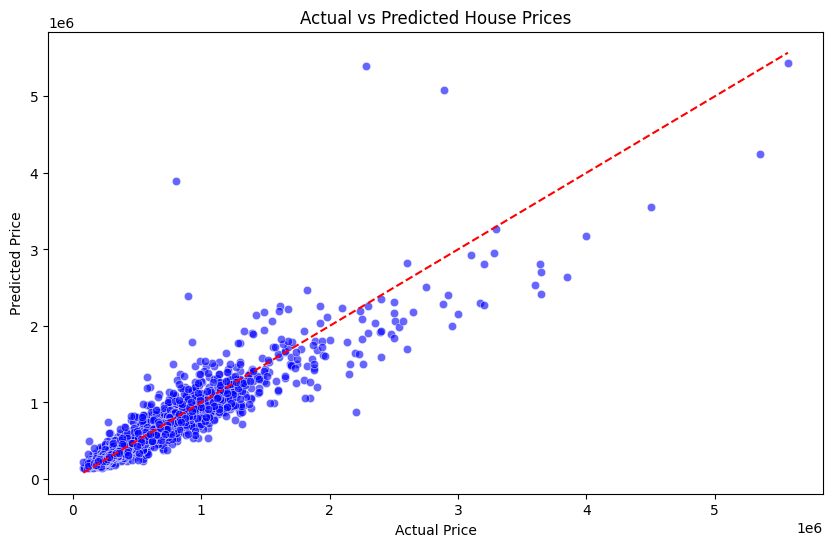

In [19]:
# Visualisasi Hasil Prediksi vs Nilai Aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

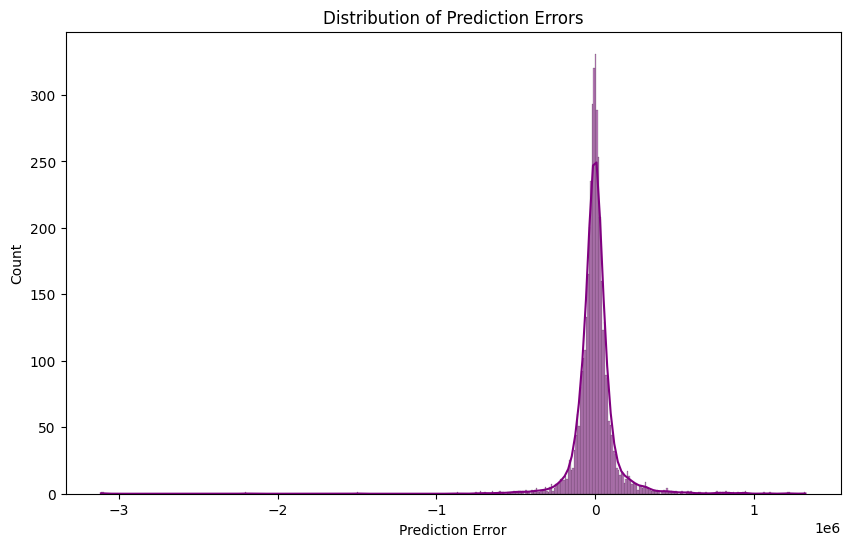

In [20]:
# Visualisasi Distribusi Error
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

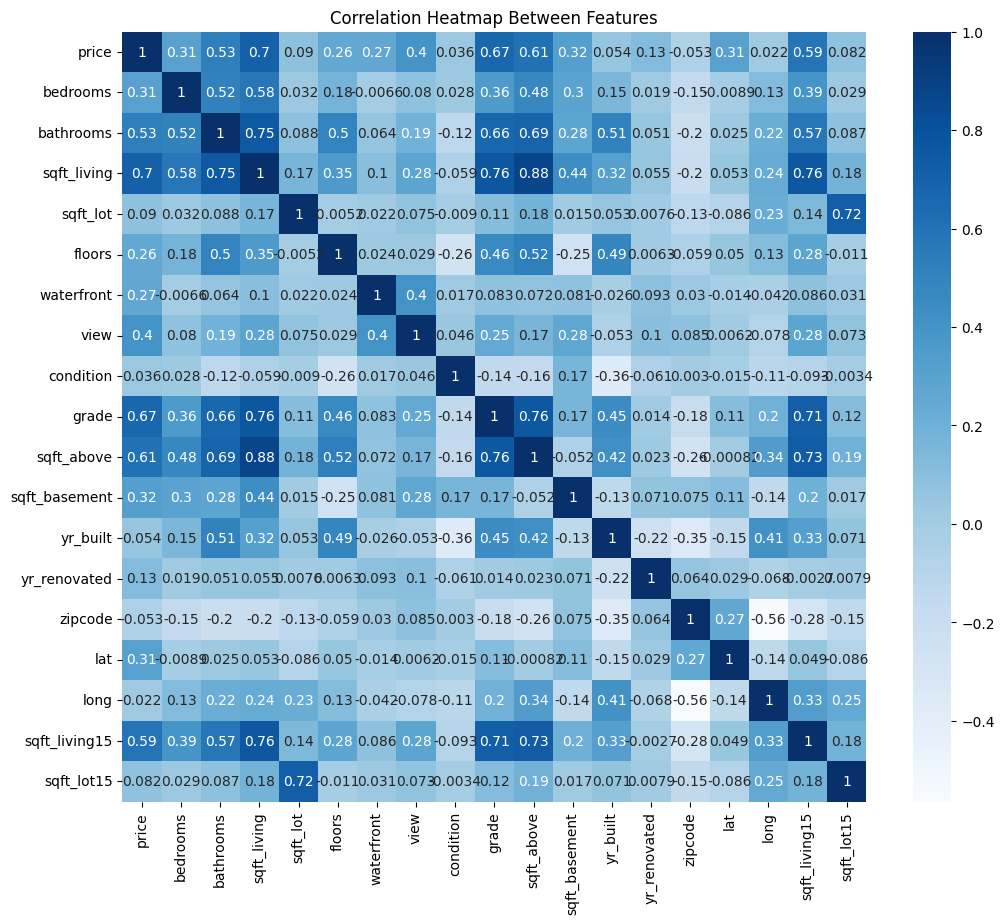

In [21]:
# Visualisasi Korelasi antar Fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap Between Features')
plt.show()

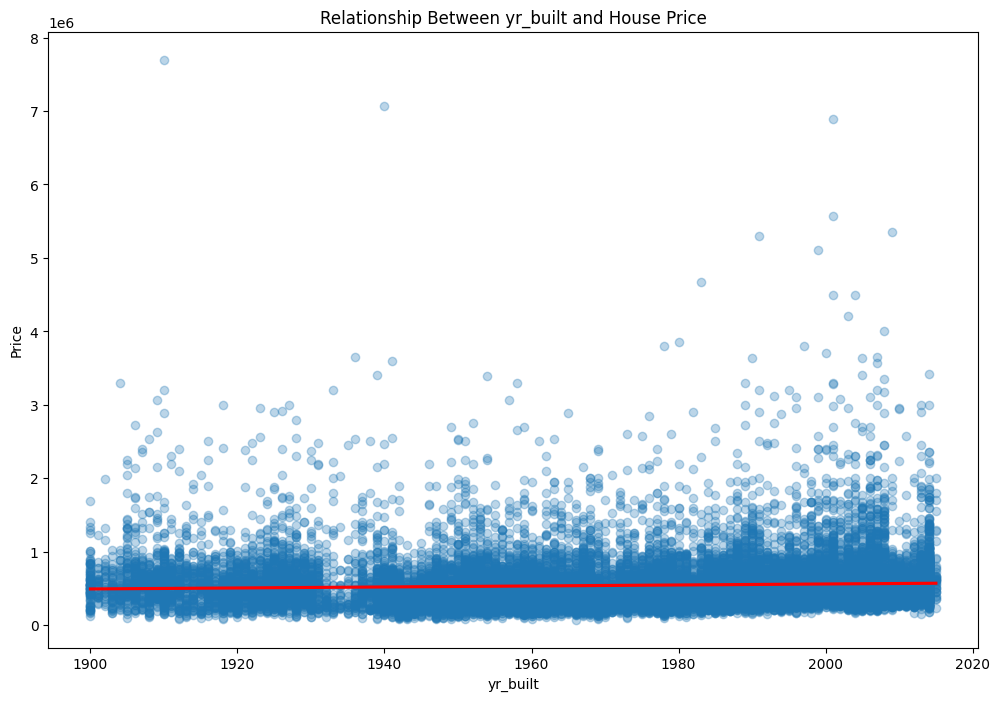

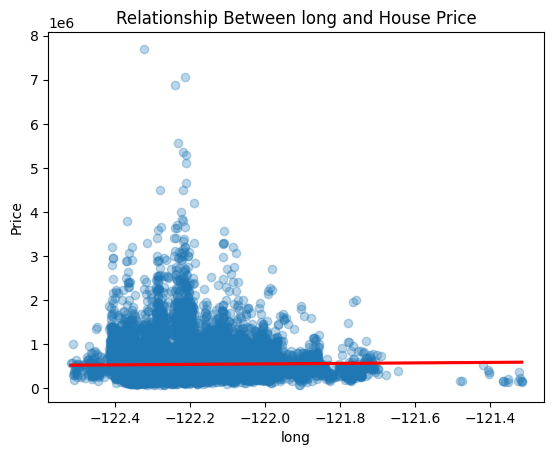

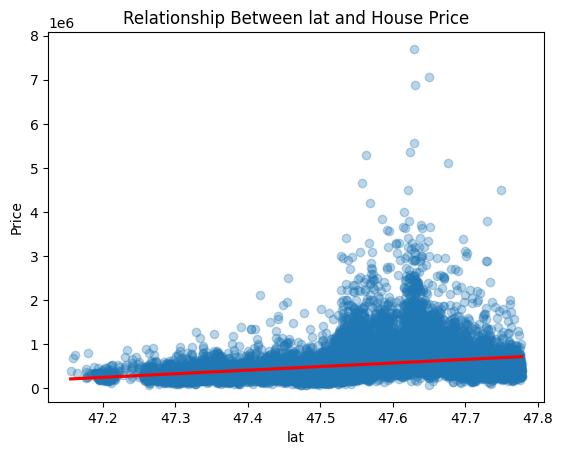

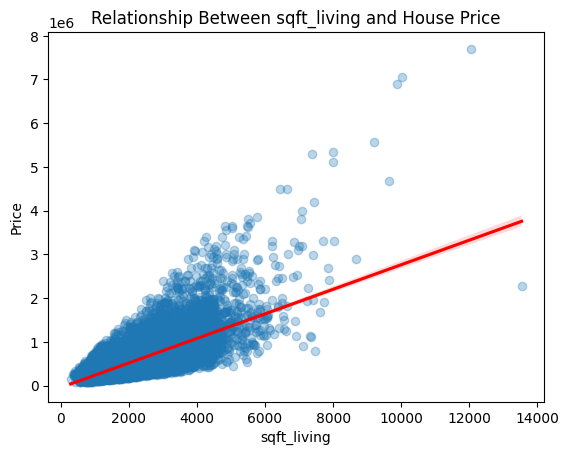

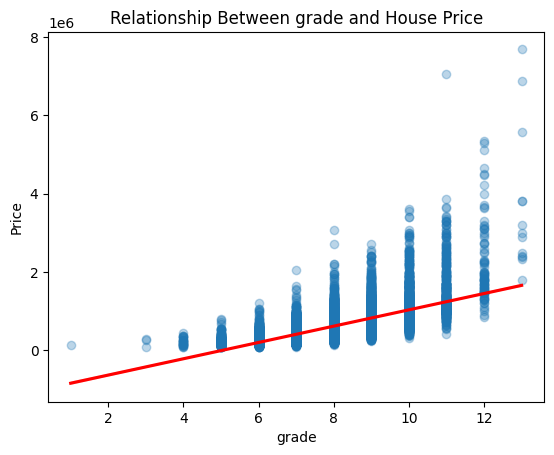

In [22]:
# Visualisasi Nilai Penting Beberapa Fitur Teratas
top_features_idx = np.argsort(feature_importances)[-5:]
top_features = [features[i] for i in top_features_idx]

plt.figure(figsize=(12, 8))
for feature in top_features:
    sns.regplot(x=df[feature], y=df['price'], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
    plt.title(f'Relationship Between {feature} and House Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()